<h1><center>Survey Improvement Analysis</center></h1>
<center>Rock n Ribs</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
df_survey = pd.read_csv('./rnr_survey_master_table.csv')
df_survey.drop(['Unnamed: 0'],axis=1, inplace=True)
df_survey[0:3]

,respondent_id,collector_id,date_created,date_modified,ip_address,NombreCliente,Email,Celular,Franquicia,Recomendacion,...,TiempoSerCliente,MedCon,OtroMedCon,AtencionMesero,NomMesero,AtencionGerente,NombreGerente,DeseoFranq,CiudadDeseoFranq,Comentarios
0,1.145620e+10,249027193.0,03/29/2020 01:13:21 AM,03/29/2020 04:09:53 AM,189.183.129.231,Armando Nigo,nigoarmando@gmail.com,4441468605,"San Luis Potosí, Slp.",10,...,Seis meses a un año,Publicidad,NaN,Bueno,Gerardo,Sí,José Luis,SI,NaN,No
1,1.145600e+10,249027193.0,03/29/2020 12:37:27 AM,03/29/2020 01:12:43 AM,189.183.129.231,Liza,liza.diazdeleon@hotmail.com,NaN,"San Luis Potosí, Slp.",9,...,Esta es mi primera visita,Lo ví,NaN,Bueno,Alejandro,No,No se,NO,NaN,No
2,1.145595e+10,249027193.0,03/29/2020 12:20:21 AM,03/29/2020 12:33:51 AM,189.183.129.231,Beatriz Martínez,beatrizmh.bh@gmail..com,4444894280,"San Luis Potosí, Slp.",10,...,Esta es mi primera visita,"Redes sociales (facebook, twitter, instagram)",NaN,Excelente,No recuerdo,No,Desconozco,NO,NaN,Deberían de poner un escenario y un día a la s...


In [3]:
df_survey.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'NombreCliente', 'Email', 'Celular', 'Franquicia',
       'Recomendacion', 'Comida', 'Bebida', 'CalidadPrecio',
       'TiempoSerCliente', 'MedCon', 'OtroMedCon', 'AtencionMesero',
       'NomMesero', 'AtencionGerente', 'NombreGerente', 'DeseoFranq',
       'CiudadDeseoFranq', 'Comentarios'],
      dtype='object')

According with our dataset, we can measure some metrics. On this notebook we are going to analyze this metrics from October 2019:
    1. Franchise customer distribution
    2. Recommendation rate
    3. Food & Drink average
    4. Price-Quality rate
    5. Client retention
    6. Advertising media effectiveness

In [4]:
# Firstly we must convert to datetime format the column date_created
df_survey['date_created'] = pd.to_datetime(df_survey['date_created'])
df_survey['date_created'][0]

Timestamp('2020-03-29 01:13:21')

In [5]:
# Create October subset
month_in = pd.to_datetime('2019-10-01 00:00:00')
month_fn = pd.to_datetime('2019-10-31 23:59:59')
df_oct_2019 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

# Create November subset
month_in = pd.to_datetime('2019-11-01 00:00:00')
month_fn = pd.to_datetime('2019-11-30 23:59:59')
df_nov_2019 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

# Create December subset
month_in = pd.to_datetime('2019-12-01 00:00:00')
month_fn = pd.to_datetime('2019-12-31 23:59:59')
df_dec_2019 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

# Create January subset
month_in = pd.to_datetime('2020-01-01 00:00:00')
month_fn = pd.to_datetime('2020-01-31 23:59:59')
df_jan_2020 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

# Create February subset
month_in = pd.to_datetime('2019-02-01 00:00:00')
month_fn = pd.to_datetime('2019-02-28 23:59:59')
df_feb_2020 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

# Create March subset
month_in = pd.to_datetime('2019-03-01 00:00:00')
month_fn = pd.to_datetime('2019-03-31 23:59:59')
df_mar_2020 = df_survey[(df_survey['date_created']>=month_in)&(df_survey['date_created']<=month_fn)]

<h2>1. Franchise customer distribution</h2>

In [6]:
df_oct_2019.isna().sum()

respondent_id         0
collector_id          0
date_created          0
date_modified         0
ip_address            0
NombreCliente        94
Email               135
Celular             154
Franquicia            2
Recomendacion         0
Comida                3
Bebida                0
CalidadPrecio         1
TiempoSerCliente     18
MedCon                5
OtroMedCon          328
AtencionMesero        3
NomMesero           153
AtencionGerente     335
NombreGerente       335
DeseoFranq            0
CiudadDeseoFranq    304
Comentarios         102
dtype: int64

In [7]:
# Recomendacion is a column without NaN values so we must use to count customers
df_oct_2019.groupby('Franquicia').sum()['Recomendacion']

Franquicia
Bernardo Quintana, Qro.           452
Jardines de la Hacienda, Qro.     345
Juriquilla, Qro.                  165
León, Gto.                        258
San Juan del Río, Qro.            285
Sendero, Qro.                    1515
Name: Recomendacion, dtype: int64

In [8]:
ber_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][0]
jar_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][1]
jur_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][2]
ln_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][3]
sjr_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][4]
sen_cust = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][5]

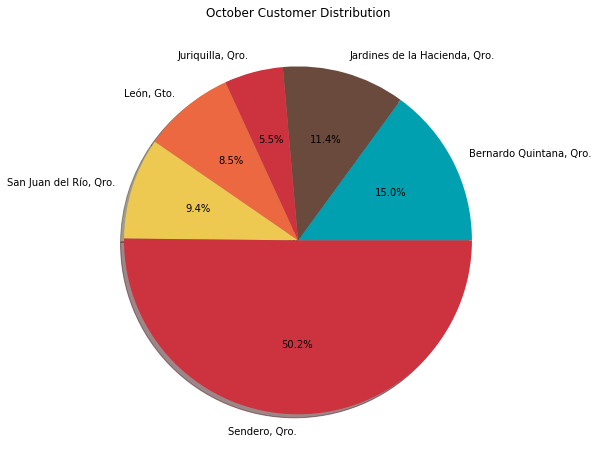

Bernardo Quintana, Qro.: 452
Jardines de la Hacienda, Qro.: 345
Juriquilla, Qro.: 165
León, Gto.: 258
San Juan del Río, Qro.: 285
Sendero, Qro.: 1515


In [9]:
# Franchise customer Pie chart
fran = ['Bernardo Quintana, Qro.', 
        'Jardines de la Hacienda, Qro.', 
       'Juriquilla, Qro.',
       'León, Gto.',
       'San Juan del Río, Qro.',
       'Sendero, Qro.']
customer_quan = [ber_cust, jar_cust, jur_cust, ln_cust, sjr_cust, sen_cust] 
colors = ['#00A0B0','#6A4A3C', '#CC333F', '#EB6841', '#EDC951', '#CC333F']

plt.figure(figsize=(10,8))
plt.pie(customer_quan, labels=fran, colors=colors, shadow=True, autopct='%1.1f%%')

plt.title('October Customer Distribution')
plt.show()

for i in range(0, len(customer_quan)):
    print(f'{fran[i]}: {customer_quan[i]}')

<h2>2. Recommendation rate</h2>

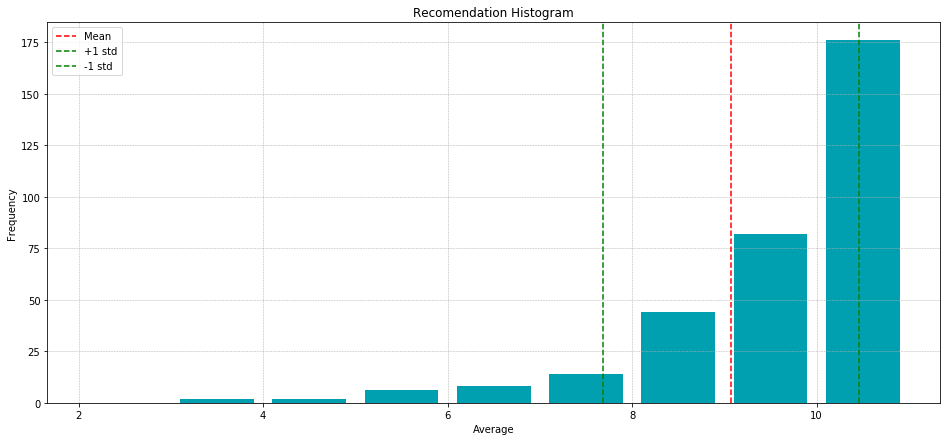

count    335.000000
mean       9.074627
std        1.389799
min        0.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: Recomendacion, dtype: float64

In [10]:
# Recomendation Histogram
recom = np.array(df_oct_2019['Recomendacion'])
bins = list(range(2, 12, 1))

plt.figure(figsize=(16,7))
plt.hist(recom, bins, histtype='bar', rwidth=0.8, color='#00A0B0')

plt.title('Recomendation Histogram')
plt.ylabel('Frequency')
plt.xlabel('Average')
plt.grid(linewidth =0.5, linestyle='--')
plt.axvline(np.mean(recom), color='red', linestyle='--', label='Mean')
plt.axvline(np.mean(recom) + np.std(recom), color='green', linestyle='--', label='+1 std')
plt.axvline(np.mean(recom) - np.std(recom), color='green', linestyle='--', label='-1 std')

plt.legend(loc='best')
plt.show()

df_oct_2019['Recomendacion'].describe()

According with the Empirical Rule, Rock n Ribs has 68% of his opinion range into a 8 to 10 average. This is a good average, but we need to know why the other customers rated us so low.

In [11]:
df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion']

Franquicia
Bernardo Quintana, Qro.          39
Jardines de la Hacienda, Qro.    18
Juriquilla, Qro.                  6
León, Gto.                       23
San Juan del Río, Qro.            7
Sendero, Qro.                    97
Name: Recomendacion, dtype: int64

In [12]:
df_oct_2019.groupby('Franquicia').sum()['Recomendacion']

Franquicia
Bernardo Quintana, Qro.           452
Jardines de la Hacienda, Qro.     345
Juriquilla, Qro.                  165
León, Gto.                        258
San Juan del Río, Qro.            285
Sendero, Qro.                    1515
Name: Recomendacion, dtype: int64

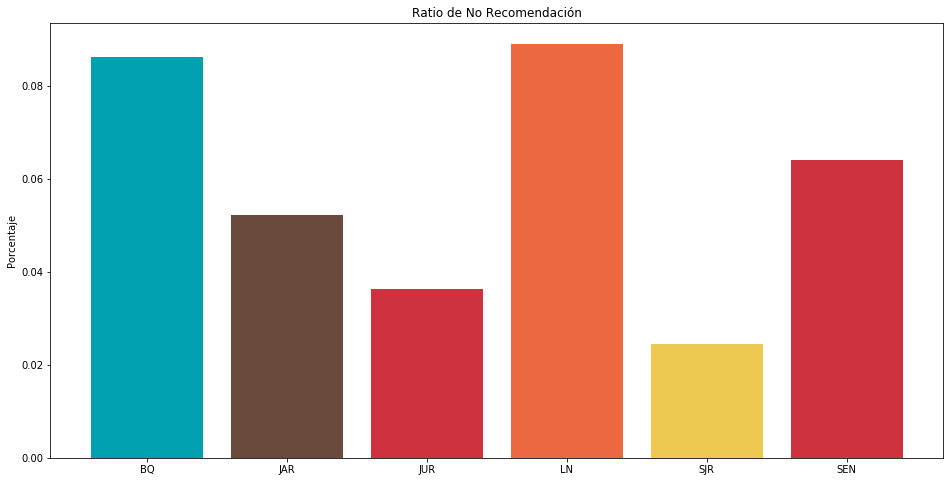

BQ : 0.0863
JAR : 0.0522
JUR : 0.0364
LN : 0.0891
SJR : 0.0246
SEN : 0.064


In [13]:
# Low recomendation rate per Franchise
lowrec_ber = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][0]
lowrec_jar = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][1]
lowrec_jur = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][2]
lowrec_ln = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][3]
lowrec_sjr = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][4]
lowrec_sen = df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia').sum()['Recomendacion'][5]

total_ber = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][0]
total_jar = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][1]
total_jur = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][2]
total_ln = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][3]
total_sjr = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][4]
total_sen = df_oct_2019.groupby('Franquicia').sum()['Recomendacion'][5]

lowrate_ber = lowrec_ber/total_ber
lowrate_jar = lowrec_jar/total_jar
lowrate_jur = lowrec_jur/total_jur
lowrate_ln = lowrec_ln/total_ln
lowrate_sjr = lowrec_sjr/total_sjr
lowrate_sen = lowrec_sen/total_sen


# Configuring a bar graph
x = ['BQ', 'JAR', 'JUR', 'LN', 'SJR', 'SEN']
y = [lowrate_ber, lowrate_jar, lowrate_jur, lowrate_ln, lowrate_sjr, lowrate_sen]

plt.figure(figsize=(16,8))
plt.bar(x, y, width=0.8, color=colors)

plt.title('Ratio de No Recomendación')
plt.ylabel('Porcentaje')

plt.show()

for i in range(0, len(x)):
    print(f'{x[i]} : {round(y[i],4)}')

We can look that Bernardo Quintana and León franchises have worst recomendation rates, in spite of the mayority bad recomendations come from Sendero. So we must analyze the comments existing.

In [14]:
df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia')['Comentarios'].count()

Franquicia
Bernardo Quintana, Qro.           5
Jardines de la Hacienda, Qro.     4
Juriquilla, Qro.                  0
León, Gto.                        4
San Juan del Río, Qro.            0
Sendero, Qro.                    15
Name: Comentarios, dtype: int64

In [15]:
coms = list(df_oct_2019[df_oct_2019['Recomendacion']<8].groupby('Franquicia')['Comentarios'])
bad_com_dict = {}
for i in range(0, len(coms)):
    bad_com_dict[f'{coms[i][0]}'] = coms[i][1]

In [16]:
# No recomendation comments from Bernardo Quintana
for i in list(bad_com_dict['Bernardo Quintana, Qro.'].keys()):
    print(bad_com_dict['Bernardo Quintana, Qro.'][i])

No
.
No
La mesa está sucia con cosas de otro servicio
nan
nan
No


In [17]:
# No recomendation comments from Jardines de la Hacienda
for i in list(bad_com_dict['Jardines de la Hacienda, Qro.'].keys()):
    print(bad_com_dict['Jardines de la Hacienda, Qro.'][i])

Después de 5 años de ser cliente frecuente, hoy mi carne estaba cruda y la gerente Alejandra no compensó está falla
Nada
Ninguno todo bien   
Ha bajado la calidad de la carne de sus hamburguesas su sabor no es el mismo


In [18]:
# No recomendation comments from León
for i in list(bad_com_dict['León, Gto.'].keys()):
    print(bad_com_dict['León, Gto.'][i])

La salsa de las alas estaba muy salada casi incomible y la costra muy gruesa
Excelente música 
La carne de las hamburguesas es MUY mala 
Mejoren la calidad de la carne


In [19]:
# No recomendation comments from Sendero
for i in list(bad_com_dict['Sendero, Qro.'].keys()):
    print(bad_com_dict['Sendero, Qro.'][i])

Deberían considerar agregar alguna salsa o picante adicional a los platillos        
Mejorar el servicio pues es muy lento
No
Ninguno
Ninguna, todo BN.
No
Ninguna me parece buen lugar
Tardan un poco más en preparae la comida que su competecia
El tiempo de espera en los alimentos es demasiado largo al igual que la toma de orden 
No
La carne de la hamburguesa ticket no tiene buen sabor
No vamos a regresar
nan
No
Buen ambiente
No


<h4>Bernardo Quintana</h4>
1. Mesas sucias
<br>
<h4>Jardines de la Hacienda</h4>
1. Gerente Alejandra no compensó la falla
<br>2. Ha bajado la calidad de carne para hamburguesa (2x)
<br>
<h4>León</h4>
1. Salsas de las alas muy saladas
<br>2. Costra de las alas muy gruesa
<br>3. Mejoren la calidad de la carne
<br>
<h4>Sendero</h4>
1. Agregar salsa picantes
<br>2. Servicio muy lento (3x)

<h2>3. Food and Drink Average</h2>

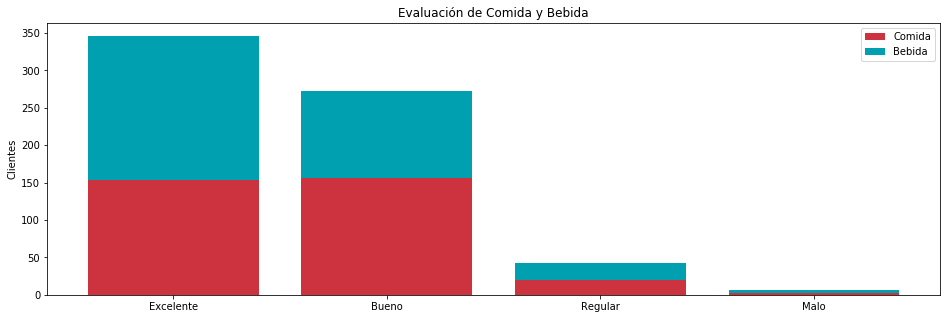

In [20]:
# Total Average Food Count
df_food_ = list(df_oct_2019['Comida'])
total_e_f = 0
total_b_f = 0
total_r_f = 0
total_m_f = 0
total_na_f = 0

for i in df_food_:
    if i == 'Excelente':
        total_e_f += 1
    elif i == 'Bueno':
        total_b_f += 1
    elif i == 'Regular':
        total_r_f += 1
    elif i == 'Malo':
        total_m_f += 1
    else:
        total_na_f += 1
        
# Total Average Drink Count
df_drink_ = list(df_oct_2019['Bebida'])
total_e_d = 0
total_b_d = 0
total_r_d = 0
total_m_d = 0
total_na_d = 0

for i in df_drink_:
    if i == 'Excelente':
        total_e_d += 1
    elif i == 'Bueno':
        total_b_d += 1
    elif i == 'Regular':
        total_r_d += 1
    elif i == 'Malo':
        total_m_d += 1
    else:
        total_na_d += 1
        
# Congigure the graph bar
plt.figure(figsize=(16,5))
avg = ['Excelente', 'Bueno', 'Regular', 'Malo']
food_list = [total_e_f, total_b_f, total_r_f, total_m_f]
drink_list = [total_e_d, total_b_d, total_r_d, total_m_d]

plt.bar(avg, food_list, label='Comida', width=0.8, color = '#CC333F')
plt.bar(avg, drink_list, label='Bebida', width=0.8, color = '#00A0B0', bottom = food_list)

plt.title('Evaluación de Comida y Bebida')
plt.ylabel('Clientes')

plt.legend(loc='best')
plt.show()

This month was very positive in terms of food and drink average. Only we need to look if REGULAR or MALO averages provided from all franchises (uniform distribution) or provided from few locals.

In [21]:
# Bad rate from Food per Franchise
df_food_outna = df_oct_2019[['Franquicia', 'Comida']].dropna()
df_food_res = df_food_outna[(df_food_outna['Comida'] == 'Regular') | (df_food_outna['Comida'] == 'Malo')].groupby('Franquicia').count()
df_food_res['Total'] = [
    df_food_outna.groupby('Franquicia').count()['Comida'][0],
    df_food_outna.groupby('Franquicia').count()['Comida'][1],
    df_food_outna.groupby('Franquicia').count()['Comida'][3],
    df_food_outna.groupby('Franquicia').count()['Comida'][5]
    ]
df_food_res

df_food_res['Rate'] = [
    df_food_res['Comida'][0]/df_food_outna.groupby('Franquicia').count()['Comida'][0],
    df_food_res['Comida'][1]/df_food_outna.groupby('Franquicia').count()['Comida'][1],
    df_food_res['Comida'][2]/df_food_outna.groupby('Franquicia').count()['Comida'][3],
    df_food_res['Comida'][3]/df_food_outna.groupby('Franquicia').count()['Comida'][5]
]
df_food_res

,Comida,Total,Rate
Franquicia,,,
"Bernardo Quintana, Qro.",2,51,0.039216
"Jardines de la Hacienda, Qro.",1,39,0.025641
"León, Gto.",6,29,0.206897
"Sendero, Qro.",14,165,0.084848


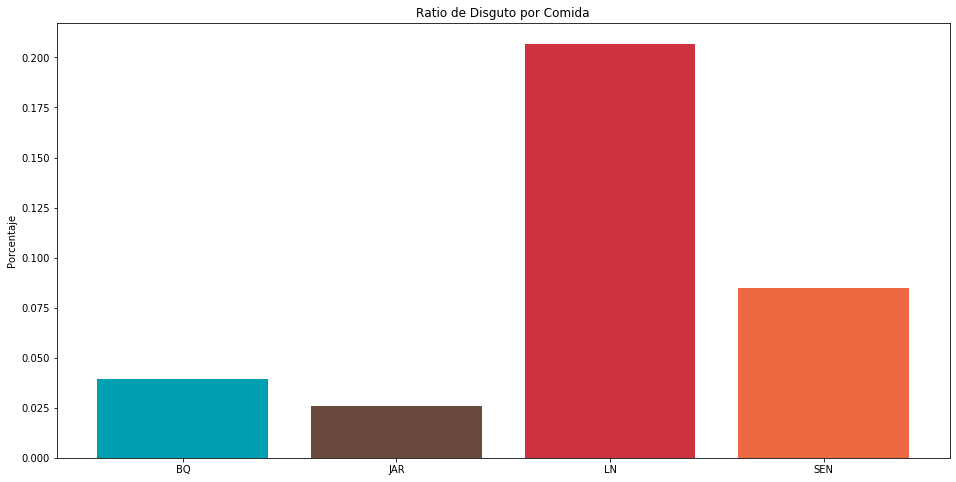

BQ : 0.0392
JAR : 0.0256
LN : 0.2069
SEN : 0.0848


In [22]:
# Configuring a bar graph
x_1 = ['BQ', 'JAR', 'LN', 'SEN']
y_1 = list(df_food_res['Rate'])

plt.figure(figsize=(16,8))
plt.bar(x_1, y_1, width=0.8, color=colors)

plt.title('Ratio de Disguto por Comida')
plt.ylabel('Porcentaje')

plt.show()

for i in range(0, len(x_1)):
    print(f'{x_1[i]} : {round(y_1[i],4)}')

After normalizing the graph according with their total customers who answer this part of the survey, we can note yet that food in León on october 2019 was the worst of all. And if we take a look to customer comments, the events relationate as well. Virtually Leon and Sendero franchise comments

In [23]:
# Bad comments from León Franchise
for i in list(bad_com_dict['León, Gto.'].keys()):
    print(bad_com_dict['León, Gto.'][i])

La salsa de las alas estaba muy salada casi incomible y la costra muy gruesa
Excelente música 
La carne de las hamburguesas es MUY mala 
Mejoren la calidad de la carne


In [24]:
# Bad comments from Sendero Franchise
for i in list(bad_com_dict['Sendero, Qro.'].keys()):
    print(bad_com_dict['Sendero, Qro.'][i])

Deberían considerar agregar alguna salsa o picante adicional a los platillos        
Mejorar el servicio pues es muy lento
No
Ninguno
Ninguna, todo BN.
No
Ninguna me parece buen lugar
Tardan un poco más en preparae la comida que su competecia
El tiempo de espera en los alimentos es demasiado largo al igual que la toma de orden 
No
La carne de la hamburguesa ticket no tiene buen sabor
No vamos a regresar
nan
No
Buen ambiente
No


Other thing that could be important to highlight is that Bernardo Quintana has a hight no recomendation rate but also has a lower bad rate about food. So this could be indicate that customers were disgusted with the service more than the food quality. 

In [25]:
# Bad rate from Drink per Franchise
df_drink_outna = df_oct_2019[['Franquicia', 'Bebida']].dropna()
df_drink_res = df_drink_outna[(df_drink_outna['Bebida'] == 'Regular') | (df_drink_outna['Bebida'] == 'Malo')].groupby('Franquicia').count()
df_drink_res['Total'] = [
    df_drink_outna.groupby('Franquicia').count()['Bebida'][0],
    df_drink_outna.groupby('Franquicia').count()['Bebida'][2],
    df_drink_outna.groupby('Franquicia').count()['Bebida'][3],
    df_drink_outna.groupby('Franquicia').count()['Bebida'][4],
    df_drink_outna.groupby('Franquicia').count()['Bebida'][5]
    ]
df_drink_res

df_drink_res['Rate'] = [
    df_drink_res['Bebida'][0]/df_drink_outna.groupby('Franquicia').count()['Bebida'][0],
    df_drink_res['Bebida'][1]/df_drink_outna.groupby('Franquicia').count()['Bebida'][2],
    df_drink_res['Bebida'][2]/df_drink_outna.groupby('Franquicia').count()['Bebida'][3],
    df_drink_res['Bebida'][3]/df_drink_outna.groupby('Franquicia').count()['Bebida'][4],
    df_drink_res['Bebida'][4]/df_drink_outna.groupby('Franquicia').count()['Bebida'][5]
]
df_drink_res

,Bebida,Total,Rate
Franquicia,,,
"Bernardo Quintana, Qro.",4,51,0.078431
"Juriquilla, Qro.",1,18,0.055556
"León, Gto.",4,29,0.137931
"San Juan del Río, Qro.",2,30,0.066667
"Sendero, Qro.",15,166,0.090361


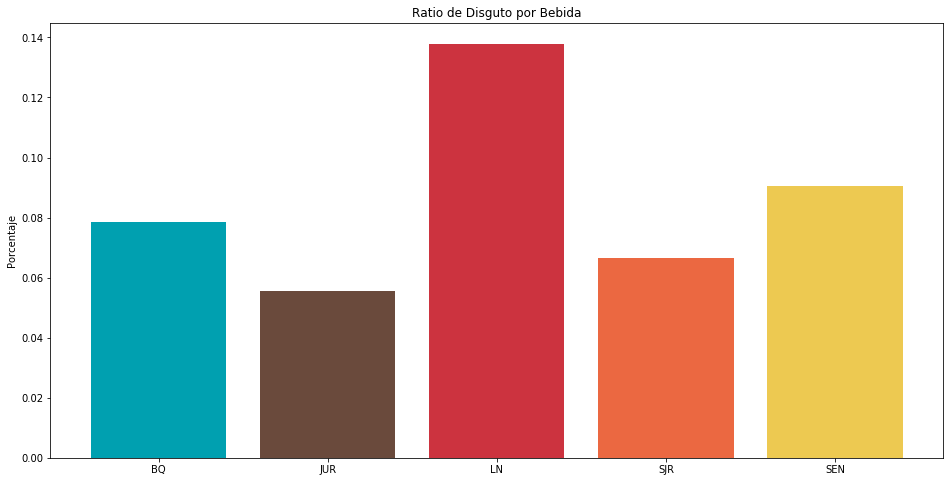

BQ : 0.0784
JUR : 0.0556
LN : 0.1379
SJR : 0.0667
SEN : 0.0904


In [26]:
# Configuring a bar graph
x_2 = ['BQ', 'JUR', 'LN', 'SJR', 'SEN']
y_2 = list(df_drink_res['Rate'])

plt.figure(figsize=(16,8))
plt.bar(x_2, y_2, width=0.8, color=colors)

plt.title('Ratio de Disguto por Bebida')
plt.ylabel('Porcentaje')

plt.show()

for i in range(0, len(x_2)):
    print(f'{x_2[i]} : {round(y_2[i],4)}')

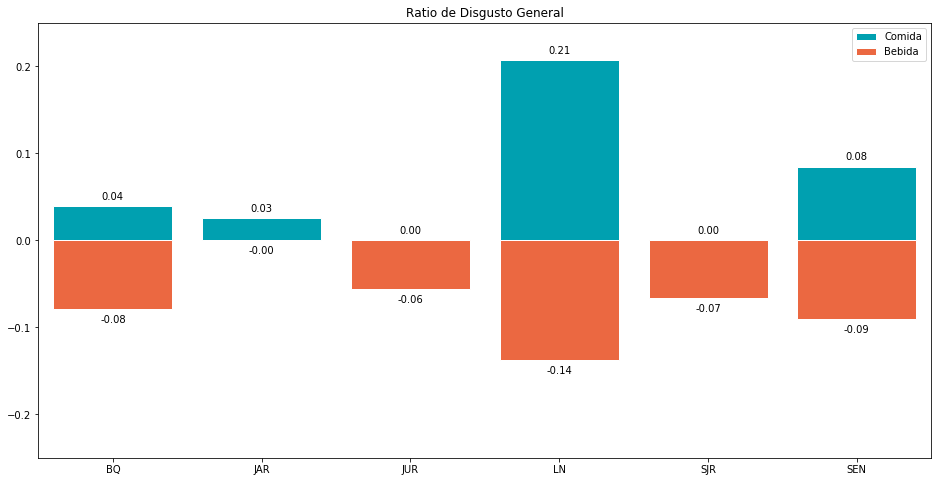

In [27]:
#Visualizing in one graph to compare food vs drink dislike
y_1 = list(df_food_res['Rate'])
y_1.insert(2,0.0)
y_1.insert(4,0.0)

y_2_pos = list(df_drink_res['Rate'])
y_2_pos.insert(1,0.0)

y_2 = []
for i in y_2_pos:
    y_2.append(i*(-1))

x_3 = ['BQ', 'JAR', 'JUR', 'LN', 'SJR', 'SEN']

# Configuring a bar graph
plt.figure(figsize=(16,8))
plt.bar(x_3, y_1, facecolor=colors[0], edgecolor='white', label='Comida')
plt.bar(x_3, y_2, facecolor=colors[3], edgecolor='white', label='Bebida')

for x, y in zip(x_3, y_1):
    plt.text(x, y + 0.005, '%.2f' % y, ha='center', va= 'bottom')
for x, y in zip(x_3, y_2):
    plt.text(x, y - 0.018, '%.2f' % y, ha='center', va= 'bottom')

plt.xlim(-.5, 5.5)
plt.ylim(-0.25, 0.25)
plt.legend(loc='best')
plt.title('Ratio de Disgusto General')

plt.show()

I conclude that Bernardo Quintana and Sendero must be append on yellow light list, but correction on food of Leon franchise is most relevant, because its averages are very lower. 

<h2>4. Price-Quality rate</h2>

In [28]:
df_pq_outna = df_oct_2019[['Franquicia', 'CalidadPrecio']].dropna()

# Bernardo Quintana Price-Quality Rate
pq_bq_sum = df_pq_outna[df_pq_outna['Franquicia']=='Bernardo Quintana, Qro.'].groupby('CalidadPrecio').count()

# Jardines de la Hacienda Price-Quality Rate
pq_jh_sum = df_pq_outna[df_pq_outna['Franquicia']=='Jardines de la Hacienda, Qro.'].groupby('CalidadPrecio').count()

# Juriquilla Price-Quality Rate
pq_jur_sum = df_pq_outna[df_pq_outna['Franquicia']=='Juriquilla, Qro.'].groupby('CalidadPrecio').count()

# León Price-Quality Rate
pq_ln_sum = df_pq_outna[df_pq_outna['Franquicia']=='León, Gto.'].groupby('CalidadPrecio').count()

# San Juan del Río Price-Quality Rate
pq_sjr_sum = df_pq_outna[df_pq_outna['Franquicia']=='San Juan del Río, Qro.'].groupby('CalidadPrecio').count()

# Sendero Price-Quality Rate
pq_sen_sum = df_pq_outna[df_pq_outna['Franquicia']=='Sendero, Qro.'].groupby('CalidadPrecio').count()

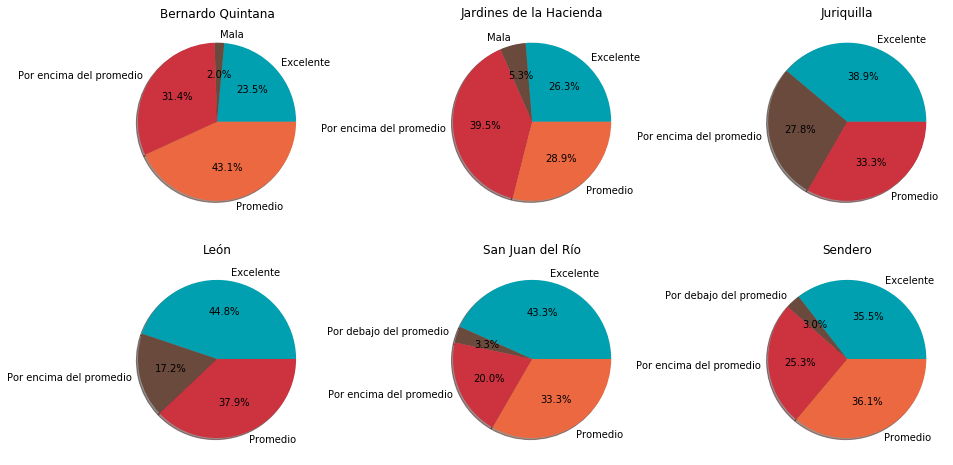

In [29]:
# Price-Quality Rate per Franchise
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.pie(list(pq_bq_sum['Franquicia']), labels=list(pq_bq_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Bernardo Quintana')

plt.subplot(2,3,2)
plt.pie(list(pq_jh_sum['Franquicia']), labels=list(pq_jh_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Jardines de la Hacienda')

plt.subplot(2,3,3)
plt.pie(list(pq_jur_sum['Franquicia']), labels=list(pq_jur_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Juriquilla')

plt.subplot(2,3,4)
plt.pie(list(pq_ln_sum['Franquicia']), labels=list(pq_ln_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('León')

plt.subplot(2,3,5)
plt.pie(list(pq_sjr_sum['Franquicia']), labels=list(pq_sjr_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('San Juan del Río')

plt.subplot(2,3,6)
plt.pie(list(pq_sen_sum['Franquicia']), labels=list(pq_sen_sum['Franquicia'].keys()), colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Sendero')

plt.show()

This metric is very dinamic month a month because the Management Team of Rock n Ribs change his prices of each franchise according to the season, the existing inventory or other events like soccer matchs with the aim to increase his revenue. Looking this graphs we can perceive that Juriquilla and León have the best scores to Price-Quality Rate, maybe because the mean cost of food in there cities is higher than the others franchise cities. 

<br>With the aim to clarify this hipothesys we take a look into https://www.inegi.org.mx/app/preciospromedio/ to understand the cost of food in these states.

In [30]:
# Download our dataset from INEGI.ORG.MX 
df_cost_food = pd.read_csv('./INP_PP.csv')
df_cost_food[0:5]

,Año,Mes,Fecha_Pub_DOF,Clave ciudad,Nombre ciudad,División,Grupo,Clase,Subclase,Clave generico,Generico,Consecutivo,Especificación,Precio promedio,Cantidad,Unidad,Estatus
0,2018,7,17/08/2018 12:00:00 a. m.,10,"León, Gto.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",01 Tortillas y derivados del maíz,1,Tortilla de maíz,1,A GRANEL,15.0,1,KG,NaN
1,2018,7,17/08/2018 12:00:00 a. m.,10,"León, Gto.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",01 Tortillas y derivados del maíz,1,Tortilla de maíz,2,A GRANEL,14.0,1,KG,NaN
2,2018,7,17/08/2018 12:00:00 a. m.,10,"León, Gto.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",01 Tortillas y derivados del maíz,1,Tortilla de maíz,3,A GRANEL,12.0,1,KG,NaN
3,2018,7,17/08/2018 12:00:00 a. m.,10,"León, Gto.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",01 Tortillas y derivados del maíz,1,Tortilla de maíz,4,A GRANEL,10.2,1,KG,NaN
4,2018,7,17/08/2018 12:00:00 a. m.,10,"León, Gto.","1. Alimentos, bebidas y tabaco",1.1. Alimentos,"1.1.1. Pan, tortillas y cereales",01 Tortillas y derivados del maíz,1,Tortilla de maíz,5,A GRANEL,11.2,1,KG,NaN


In [31]:
# Filtering according with supplies needed for cooking Rock n Ribs dishes
df_cost_food[(df_cost_food['Generico']=='Pan de caja') | 
(df_cost_food['Generico']=='Carne de res') |
(df_cost_food['Generico']=='Carne de cerdo') |
(df_cost_food['Generico']=='Pollo') |
(df_cost_food['Generico']=='Tocino') |
(df_cost_food['Generico']=='Cerveza') |
(df_cost_food['Generico']=='Ron') |
(df_cost_food['Generico']=='Masa y harinas de maíz') |
(df_cost_food['Generico']=='Masa y harinas de maíz')].groupby('Nombre ciudad').describe()['Precio promedio']

,count,mean,std,min,25%,50%,75%,max
Nombre ciudad,,,,,,,,
"León, Gto.",94.0,106.756489,70.372547,12.9,54.25,90.5,138.0,316.00
"Querétaro, Qro.",94.0,108.832979,66.504867,13.0,56.00,100.0,147.5,328.25


Unfortunately does not exist crearly information about cost of food per each township, so we can get data only from principal cities on our states. Even so, we look that the diference in prices between both cities is not relevant. Possibly we could develop other analysis about our providers prices to compare with others. Also we could scrapping the costs of our restaurant rivals.

<h2>5. Client Retention</h2>

In [32]:
# We take Recomendacion column like a reference to count easily without NaN values
df_be_cust = pd.DataFrame(df_oct_2019[['Franquicia','TiempoSerCliente','Recomendacion']].groupby(['Franquicia', 'TiempoSerCliente']).count())
df_be_cust

Recomendacion
Franquicia                    TiempoSerCliente                        
Bernardo Quintana, Qro.       1-2 años                              12
                              3 años o más                          15
                              Esta es mi primera visita              8
                              Seis meses a un año                   13
Jardines de la Hacienda, Qro. 1-2 años                              12
                              3 años o más                           9
                              Esta es mi primera visita              6
                              Seis meses a un año                   10
Juriquilla, Qro.              1-2 años                               6
                              3 años o más                           5
                              Esta es mi primera visita              4
                              Seis meses a un año                    3
León, Gto.                    1-2 años                               1
                              Esta es mi primera visita             23
                              Seis meses a un año                    4
San Juan del Río, Qro.        1-2 años                               7
                              3 años o más                           3
                              Esta es mi primera visita              8
                              Seis meses a un año                   12
Sendero, Qro.                 1-2 años                              52
                              3 años o más                          33
                              Esta es mi primera visita             26
                              Seis meses a un año                   44

In [33]:
keys_be_cust = list(df_be_cust['Recomendacion'].keys())

params_dict = {}
for i in range(0, len(keys_be_cust)-1):
    params_dict[f'{keys_be_cust[i][0]} , {keys_be_cust[i][1]}'] = df_be_cust['Recomendacion'][keys_be_cust[i][0]][keys_be_cust[i][1]]

In [34]:
y_bq = [params_dict['Bernardo Quintana, Qro. , Esta es mi primera\xa0visita'], 
        params_dict['Bernardo Quintana, Qro. , Seis meses a un año'],
        params_dict['Bernardo Quintana, Qro. , 1-2 años'],
        params_dict['Bernardo Quintana, Qro. , 3 años o más']]
        
y_jh = [params_dict['Jardines de la Hacienda, Qro. , Esta es mi primera\xa0visita'], 
        params_dict['Jardines de la Hacienda, Qro. , Seis meses a un año'],
        params_dict['Jardines de la Hacienda, Qro. , 1-2 años'],
        params_dict['Jardines de la Hacienda, Qro. , 3 años o más']]
        
y_jur = [params_dict['Jardines de la Hacienda, Qro. , Esta es mi primera\xa0visita'], 
        params_dict['Jardines de la Hacienda, Qro. , Seis meses a un año'],
        params_dict['Jardines de la Hacienda, Qro. , 1-2 años'],
        params_dict['Jardines de la Hacienda, Qro. , 3 años o más']]

y_ln = [params_dict['León, Gto. , Esta es mi primera\xa0visita'], 
        params_dict['León, Gto. , Seis meses a un año'],
        params_dict['León, Gto. , 1-2 años'],
        0]

y_sjr = [params_dict['San Juan del Río, Qro. , Esta es mi primera\xa0visita'], 
        params_dict['San Juan del Río, Qro. , Seis meses a un año'],
        params_dict['San Juan del Río, Qro. , 1-2 años'],
        params_dict['San Juan del Río, Qro. , 3 años o más']]

y_sen = [params_dict['Sendero, Qro. , Esta es mi primera\xa0visita'], 
        0,
        params_dict['Sendero, Qro. , 1-2 años'],
        params_dict['Sendero, Qro. , 3 años o más']]

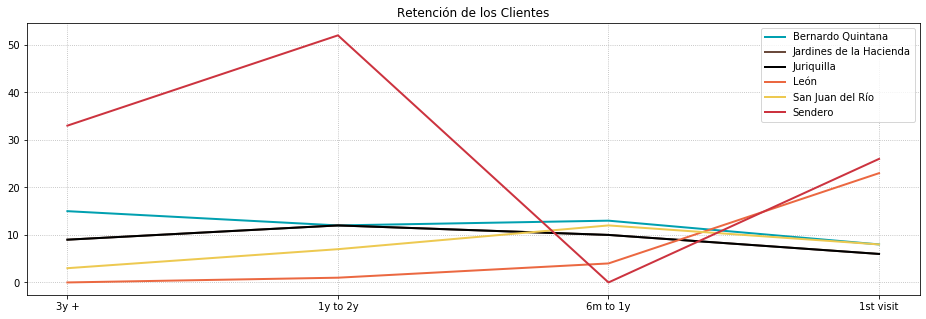

In [35]:
# Design the graph bar
x = ['1st visit', '6m to 1y', '1y to 2y', '3y +']

plt.figure(figsize=(16,5))
plt.plot(x, y_bq, label='Bernardo Quintana', linewidth=2, color=colors[0])
plt.plot(x, y_jh, label='Jardines de la Hacienda', linewidth=2, color=colors[1])
plt.plot(x, y_jur, label='Juriquilla', linewidth=2, color='k')
plt.plot(x, y_ln, label='León', linewidth=2, color=colors[3])
plt.plot(x, y_sjr, label='San Juan del Río', linewidth=2, color=colors[4])
plt.plot(x, y_sen, label='Sendero', linewidth=2, color=colors[5])

plt.gca().invert_xaxis()
plt.title('Retención de los Clientes')
plt.xlabel = ('Tiempo de Ser Cliente')
plt.ylabel = ('Clientes')
plt.grid(linewidth=0.8, linestyle=':')
plt.legend(loc='best')

plt.show()

Most customer quantity came from Sendero, in specific the customers whose first visit was 1 year to back. Sendero and León had an increment for new clients on October, but the other franchises had a decrease on this topic. The customer retention in general is uniform but partly decreasing, with an exception in Sendero, which retention was been 
very changeable, in this case we need to look up other retention rate months to have a best look for this event.

<h2>6. Advertising media effectiveness</h2>

In [36]:
df_oct_2019.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'NombreCliente', 'Email', 'Celular', 'Franquicia',
       'Recomendacion', 'Comida', 'Bebida', 'CalidadPrecio',
       'TiempoSerCliente', 'MedCon', 'OtroMedCon', 'AtencionMesero',
       'NomMesero', 'AtencionGerente', 'NombreGerente', 'DeseoFranq',
       'CiudadDeseoFranq', 'Comentarios'],
      dtype='object')

In [37]:
# Firstly we must to analyze if comments about Other Media Ways are relevant
df_oct_2019['OtroMedCon'].dropna()

4523                      Vivo cercas
4565                     Amiga/cajera
4660                           Visita
4749        Vista x entregas de rappi
4778                 Amigos borrachos
4785                Trabajo a un lado
4816    Me invitaron en mi cumpleaños
Name: OtroMedCon, dtype: object

Live or work near to Rock n Ribs restaurants is not relevant; we assume this fact yet. The other comments could group on Recomendation subgroup. The most important comment is from friend of workers, is important because we can create comercial strategies to attract these potential clients.

In [71]:
df_medcon_outna = df_oct_2019[['Franquicia','MedCon', 'Recomendacion']].dropna()
df_medcon_outna.groupby(['Franquicia', 'MedCon']).count()

Recomendacion
Franquicia                    MedCon                                                      
Bernardo Quintana, Qro.       Lo ví                                                     14
                              Publicidad                                                 5
                              Recomendación                                             14
                              Redes sociales (facebook, twitter, instagram)             17
Jardines de la Hacienda, Qro. Lo ví                                                      8
                              Otro (especifique)                                         2
                              Publicidad                                                 5
                              Recomendación                                             16
                              Redes sociales (facebook, twitter, instagram)              7
Juriquilla, Qro.              Lo ví                                                      3
                              Otro (especifique)                                         1
                              Recomendación                                             11
                              Redes sociales (facebook, twitter, instagram)              3
León, Gto.                    Lo ví                                                     13
                              Otro (especifique)                                         1
                              Publicidad                                                 1
                              Recomendación                                              6
                              Redes sociales (facebook, twitter, instagram)              7
San Juan del Río, Qro.        Lo ví                                                     10
                              Publicidad                                                 4
                              Recomendación                                             12
                              Redes sociales (facebook, twitter, instagram)              4
Sendero, Qro.                 Lo ví                                                     66
                              Otro (especifique)                                         3
                              Publicidad                                                15
                              Página web                                                 5
                              Recomendación                                             54
                              Redes sociales (facebook, twitter, instagram)             21

In [72]:
df_medcon_outna.groupby(['Franquicia', 'MedCon']).count()['Recomendacion']['Bernardo Quintana, Qro.']['Lo ví']

14

In [82]:
keys_list_medcon = list(df_medcon_outna.groupby(['Franquicia', 'MedCon']).count()['Recomendacion'].keys())

In [83]:
medcon_dict = {}
for key in keys_list_medcon:
    medcon_dict[f'{key[0]},{key[1]}'] = df_medcon_outna.groupby(['Franquicia', 'MedCon']).count()['Recomendacion'][key[0]][key[1]]

In [85]:
bq_watch = medcon_dict['Bernardo Quintana, Qro.,Lo ví']
bq_adv = medcon_dict['Bernardo Quintana, Qro.,Publicidad']
bq_rec = medcon_dict['Bernardo Quintana, Qro.,Recomendación']
bq_sm = medcon_dict['Bernardo Quintana, Qro.,Redes sociales (facebook, twitter, instagram)']
bq_medcon_list = [bq_watch, bq_adv, bq_rec, bq_sm]

jh_watch = medcon_dict['Jardines de la Hacienda, Qro.,Lo ví']
jh_adv = medcon_dict['Jardines de la Hacienda, Qro.,Publicidad']
jh_rec = medcon_dict['Jardines de la Hacienda, Qro.,Recomendación']
jh_sm = medcon_dict['Jardines de la Hacienda, Qro.,Redes sociales (facebook, twitter, instagram)']
jh_medcon_list = [jh_watch, jh_adv, jh_rec, jh_sm]

jur_watch = medcon_dict['Juriquilla, Qro.,Lo ví']
jur_rec = medcon_dict['Juriquilla, Qro.,Recomendación']
jur_sm = medcon_dict['Juriquilla, Qro.,Redes sociales (facebook, twitter, instagram)']
jur_medcon_list = [jur_watch, jur_rec, jur_sm]

ln_watch = medcon_dict['León, Gto.,Lo ví']
ln_adv = medcon_dict['León, Gto.,Publicidad']
ln_rec = medcon_dict['León, Gto.,Recomendación']
ln_sm = medcon_dict['León, Gto.,Redes sociales (facebook, twitter, instagram)']
ln_medcon_list = [ln_watch, ln_adv, ln_rec, ln_sm]

sjr_watch = medcon_dict['San Juan del Río, Qro.,Lo ví']
sjr_adv = medcon_dict['San Juan del Río, Qro.,Publicidad']
sjr_rec = medcon_dict['San Juan del Río, Qro.,Recomendación']
sjr_sm = medcon_dict['San Juan del Río, Qro.,Redes sociales (facebook, twitter, instagram)']
sjr_medcon_list = [sjr_watch, sjr_adv, sjr_rec, sjr_sm]

sen_watch = medcon_dict['Sendero, Qro.,Lo ví']
sen_adv = medcon_dict['Sendero, Qro.,Publicidad']
sen_rec = medcon_dict['Sendero, Qro.,Recomendación']
sen_sm = medcon_dict['Sendero, Qro.,Redes sociales (facebook, twitter, instagram)']
sen_web = medcon_dict['Sendero, Qro.,Página web']
sen_medcon_list = [sen_watch, sen_adv, sen_rec, sen_sm, sen_web]

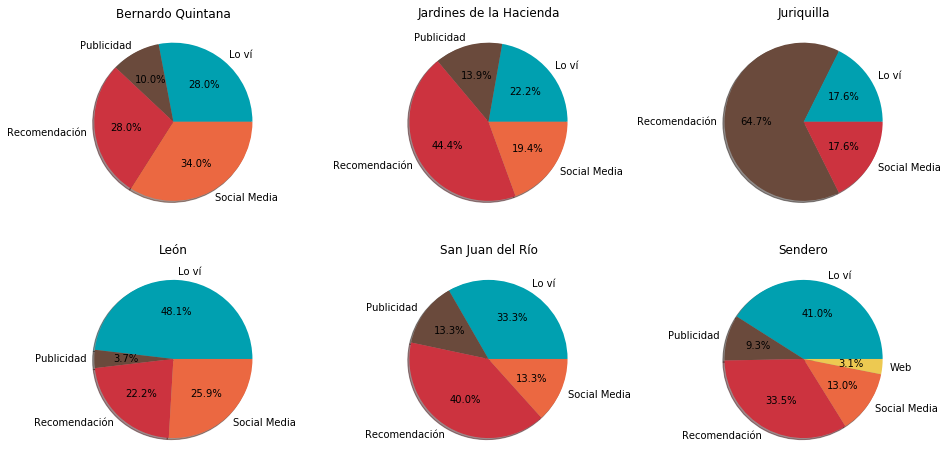

In [90]:
# Customer way to knew Rock n Ribs
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.pie(bq_medcon_list , labels=['Lo ví', 'Publicidad', 'Recomendación', 'Social Media'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Bernardo Quintana')

plt.subplot(2,3,2)
plt.pie(jh_medcon_list , labels=['Lo ví', 'Publicidad', 'Recomendación', 'Social Media'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Jardines de la Hacienda')

plt.subplot(2,3,3)
plt.pie(jur_medcon_list , labels=['Lo ví', 'Recomendación', 'Social Media'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Juriquilla')

plt.subplot(2,3,4)
plt.pie(ln_medcon_list , labels=['Lo ví', 'Publicidad', 'Recomendación', 'Social Media'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('León')

plt.subplot(2,3,5)
plt.pie(sjr_medcon_list , labels=['Lo ví', 'Publicidad', 'Recomendación', 'Social Media'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('San Juan del Río')

plt.subplot(2,3,6)
plt.pie(sen_medcon_list , labels=['Lo ví', 'Publicidad', 'Recomendación', 'Social Media', 'Web'], colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Sendero')

plt.show()

We observed that Recomendation and Watch on Street are our biggest source of customers. It's logical that Juriquilla had lower Watch on Street rate than the others franchises because it location does not the best. Sendero, instead has very good location on a fluent avenue. 
<br>
<br>Social Media and Advertising Campaigns are our second pack to get customers, but in this analysis, the Web source was really poor, so it is a red light for us, we need to improve the SEO and SEM of our web page to get more customers of this source.